# Import The Necessary Modules

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split # make training & testing data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Helper Functions

In [3]:
def specificity_score(y_validation, y_pred_val_model):
    # Separate Confusion Matrix for Specificity Value
    TP = confusion_matrix(y_validation,y_pred_val_model)[1][1]
    TN = confusion_matrix(y_validation,y_pred_val_model)[0][0]
    FP = confusion_matrix(y_validation,y_pred_val_model)[0][1]
    FN = confusion_matrix(y_validation,y_pred_val_model)[1][0]
    return TN / (TN + FP)

def printConfusionMatrix(y_validation, y_pred_val_model):
    print('Confusion Matrix')
    print('[[TN  FP]')
    print(' [FN  TP]]')
    print()
    print(confusion_matrix(y_validation, y_pred_val_model))
    print()
    
def printResults(y_validation, y_pred_val_model):
    print(f'Accuracy: {accuracy_score(y_validation, y_pred_val_model)}')
    print(f'Precision: {precision_score(y_validation, y_pred_val_model)}')
    print(f'Recall: {recall_score(y_validation, y_pred_val_model)}')
    print(f'Specificity: {specificity_score(y_validation, y_pred_val_model)}')
    print(f'F1-Score: {f1_score(y_validation, y_pred_val_model)}')

# Set Up Autism DataFrame

In [4]:
# Convert excel file into DataFrame
# If you have trouble reading this file, you may need to do this command in the terminal: pip install openpyxl 
autism = pd.read_excel('Autism_Screening_Adult.xlsx')
autism = autism.drop(columns=['Ethnicity','Country_of_Res','Used_App_Before','Relation','Age_Desc'])

# Convert "yes" values to 1 and "no" values to 0
autism = autism.replace({'no':0,'yes':1,'NO':0,'YES':1})

# Convert "f" to 0 and "m" to 1
autism = autism.replace({'f':0,'m':1})

# Convert '?' and the outlier to NaN
autism = autism.replace('?',np.nan)
autism = autism.replace(383.0,np.nan)

# Drop missing values and outlier
autism = autism.dropna()

# Set Up Training, Validation, and Test Data

In [16]:
X = autism.drop(columns=['Class/ASD'])
y = autism['Class/ASD']

### Separate Training, Validation, and Test Data ###
seed=np.random.seed(123)

# Set up the Test Data
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=71) #70 rows is 10% of the autism dataframe; we added one to leave 630 rows left 

# Set up Training and Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_val, y_val, test_size=140) # 140 rows is 20% of the autism dataframe

### Sizes of Each Dataset

In [17]:
# Print sizes of each set
print('Training')
print('X:',X_train.shape)
print('y:',y_train.shape)
print()

print('Validation')
print('X:',X_val.shape)
print('y:',y_val.shape)
print()

print('Test')
print('X:',X_test.shape)
print('y:',y_test.shape)

Training
X: (490, 15)
y: (490,)

Validation
X: (140, 15)
y: (140,)

Test
X: (71, 15)
y: (71,)


# Models

## K Nearest Neighbors Classifier

In [14]:
best_score = 0
best_k = 0

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #y_pred_val = knn.predict(X_val)
    score = knn.score(X_val, y_val)
    if score > best_score:
        best_score = score
        best_k = k

### Validation

In [8]:
# Generate new model with the best k-value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Validate the new model
knn.fit(X_train, y_train)
y_pred_val_knn = knn.predict(X_val)

# Print values of the confusion matrix
printConfusionMatrix(y_val, y_pred_val_knn)

# Print results
printResults(y_val, y_pred_val_knn)

Confusion Matrix
[[TN  FP]
 [FN  TP]]

[[103   0]
 [  0  37]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1-Score: 1.0


## Gaussian Naive Bayes Classifier

In [9]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_val_bayes = naive_bayes.predict(X_val)

### Validation

In [10]:
# Print values of the confusion matrix
printConfusionMatrix(y_val, y_pred_val_bayes)

# Print results
printResults(y_val, y_pred_val_bayes)

Confusion Matrix
[[TN  FP]
 [FN  TP]]

[[101   2]
 [  1  36]]

Accuracy: 0.9785714285714285
Precision: 0.9473684210526315
Recall: 0.972972972972973
Specificity: 0.9805825242718447
F1-Score: 0.96


## Decision Tree Classifier

In [11]:
# Print the columns to help choose features
print(autism.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Jaundice', 'Relative', 'Result', 'Class/ASD'],
      dtype='object')


In [12]:
features = X_train.columns
depth_limit = None

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth_limit)

# Fit the model
decision_tree.fit(X_train[features], y_train)

# Predict on validation data
y_pred_val_decision_tree = decision_tree.predict(X_val[features])

### Validation

Confusion Matrix
[[TN  FP]
 [FN  TP]]

[[103   0]
 [  0  37]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1-Score: 1.0



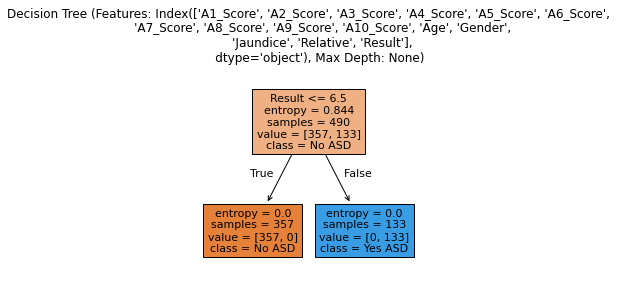

In [15]:
# Print values of the confusion matrix
printConfusionMatrix(y_val, y_pred_val_decision_tree)

# Print results
printResults(y_val, y_pred_val_decision_tree)
print()

# Print the tree
plt.figure(figsize=(4,4))
plot_tree(decision_tree, feature_names=features, class_names=['No ASD','Yes ASD'], filled=True)
plt.title(f'Decision Tree (Features: {features}, Max Depth: {depth_limit})')
plt.show()

## ROC Curve With AUC

In [ ]:
fig,ax = plt.subplots(ncols=3,sharex=True,sharey=True)
#sns.histplot(data=data[data['Class']=='M'],x='Radius',y='Texture',ax=ax[0])
#sns.histplot(data=data[data['Class']=='B'],x='Radius',y='Texture',ax=ax[1])




plt.show()

# Testing